In [1]:
import findspark

findspark.init()

from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc

from collections import namedtuple

# import tweepy
# from tweepy import OAuthHandler, Stream
# from tweepy.streaming import StreamListener
# import socket
# import json

In [2]:
sc = SparkContext()
ssc = StreamingContext(sc, 10)
sqlContext = SQLContext(sc)

socket_stream = ssc.socketTextStream("127.0.0.1",9997)
lines = socket_stream.window(20)

fields = ('tag','count')
Tweet = namedtuple('Tweet',fields)

(lines.flatMap(lambda text: text.split(" "))
 .filter(lambda word: word.lower().startswith('#'))
 .map(lambda word: (word.lower(),1))
 .reduceByKey(lambda a, b: a+ b)
 .map(lambda rec: Tweet(rec[0],rec[1]))
 .foreachRDD(lambda rdd: rdd.toDF().sort(desc('count'))
             .limit(10).registerTempTable('tweets')))

In [3]:
ssc.start()

In [9]:
import time
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

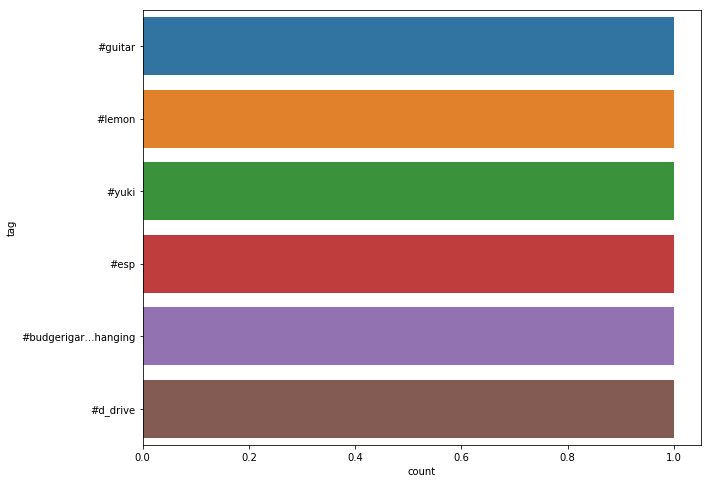

In [12]:
count = 0
while count < 10:
    
    time.sleep(3)
    top_10_tweets = sqlContext.sql('Select tag, count from tweets')
    top_10_df = top_10_tweets.toPandas()
    display.clear_output(wait=True)
    plt.figure(figsize=(10,8))
    sns.barplot(x="count",y="tag",data=top_10_df)
    plt.show()
    count+=1

In [13]:
ssc.stop()

In [4]:
# consumer_key = %env TWITTER_API_KEY
# consumer_secret = %env TWITTER_API_SECRET_KEY
# access_token = %env TWITTER_ACCESS_TOKEN
# access_secret = %env TWITTER_ACCESS_TOKEN_SECRET

In [5]:
# class TwitterListener(StreamListener):
    
#     def __init__(self, csocket):
#         self.client_socket = csocket
        
#     def on_data(self,data):
        
#         try:
#             msg = json.loads(data)
#             print(msg['text'].encode('utf-8'))
#             self.client_socket.send(msg['text'].encode('utf-8'))
#             return True
#         except BaseException as e:
#             print("ERROR ",e)
#         return True
    
#     def on_error(self, status):
#         print(status)
#         return True

In [6]:
# def sendData(c_socket):
#     auth = OAuthHandler(consumer_key, consumer_secret)
#     auth.set_access_token(access_token,access_secret)
    
#     twitter_stream = Stream(auth, TweetListener(c_socket))
#     twitter_Stream.filter(track=['guitar'])

In [7]:
# if __name__ == '__main__':
#     s = socket.socket()
#     host = '127.0.0.1'
#     port = 9999
#     s.bind((host,port))
    
#     print(f'listening on port {port}')
    
#     s.listen(5)
#     c,addr = s.accept()
    
#     sendData(c)

In [8]:
# sc = SparkContext('local[2]','NetworkWordCount')
# ssc = StreamingContext(sc,1)
# lines = ssc.socketTextStream('localhost',9999)
# words = lines.flatMap(lambda line: line.split(' '))
# pairs = words.map(lambda word: (word,1))
# word_counts = pairs.reduceByKey(lambda num1, num2: num1+num2)
# word_counts.pprint()
# ssc.start()